<font size="5">**Imports**</font>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

<font size="5">**Dataset preparation**</font>

In [ ]:
risk_factors = pd.read_csv(r"C:\Users\Dana\OneDrive\Desktop\assignment2\Risk_factors.csv")
#Remove redundant columns
risk_factors = risk_factors.drop(['STRUCTURE_ID', 'STRUCTURE', 'STRUCTURE_NAME', 'ACTION', 
                                  'REF_AREA', 'FREQ', 'Frequency of observation', 'MEASURE', 
                                  'AGE', 'SEX', 'UNIT_MEASURE','METHODOLOGY', 'Measurement method', 
                                  'Time period', 'Observation value', 'OBS_STATUS', 'UNIT_MULT', 
                                  'Unit multiplier', 'DECIMALS','Decimals'], axis = 1)
#Rename certain columns
risk_factors = risk_factors.rename(columns={"TIME_PERIOD": "Time period", 
                                            "OBS_VALUE": "Observation value"})

<font size="5">**Bar plot**</font>

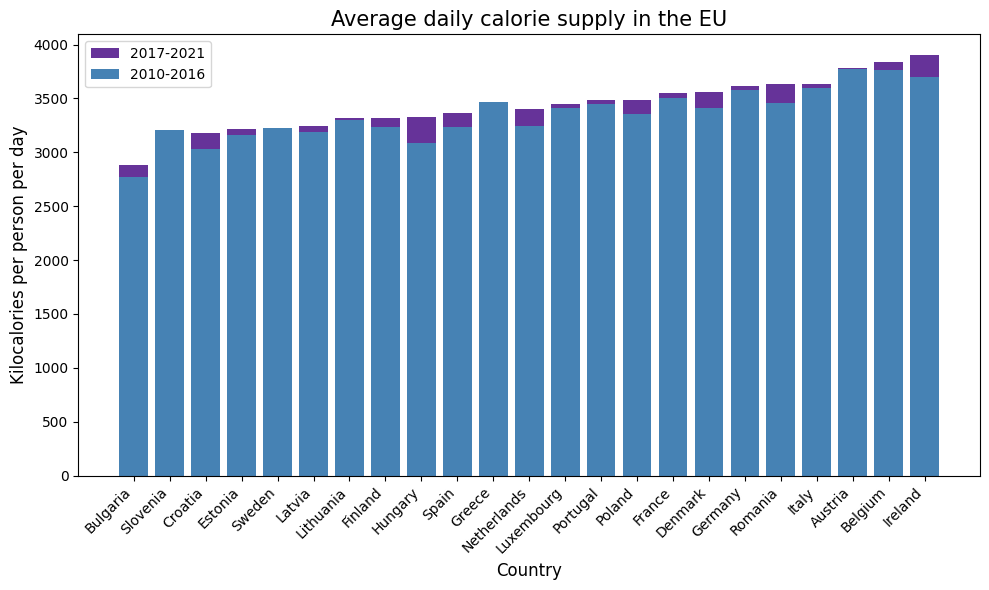

In [5]:
#Extract needed columns from the original dataset
calorie_supply = risk_factors.loc[:, ['Time period', 'Reference area', 'Measure', 
                                      'Observation value', 'Unit of measure']]
calorie_supply = calorie_supply.loc[calorie_supply['Measure'] == 'Calories supply']

#Filter out EU countries
EU = ['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic',
      'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 
      'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands', 
      'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden']
calorie_supply = calorie_supply.loc[(risk_factors['Reference area'].isin(EU))]

#Split data in two periods for comparison
supply_17_to_21 = calorie_supply.loc[risk_factors['Time period'] >= 2017]
supply_11_to_16 = calorie_supply.loc[(risk_factors['Time period'] <= 2016) &
                                     (risk_factors['Time period'] >= 2011)]

#Group data by the mean supply value 
supply_17_to_21 = supply_17_to_21.groupby(['Reference area'])['Observation value'].mean()
supply_11_to_16 = supply_11_to_16.groupby(['Reference area'])['Observation value'].mean()

#Remove missing values and sort needed data in ascending order
supply_17_to_21 = supply_17_to_21.dropna()
supply_17_to_21 = supply_17_to_21.sort_values()
supply_11_to_16 = supply_11_to_16.dropna()
supply_11_to_16 = supply_11_to_16.sort_values()


#Construct the plot
fig, ax = plt.subplots(figsize = (10,6))
ax.bar(supply_17_to_21.index, supply_17_to_21, 
       label='2017-2021', 
       align='center', 
       color='rebeccapurple', 
       width = 0.8)
ax.bar(supply_11_to_16.index, supply_11_to_16, 
       label='2010-2016', 
       align='center', 
       color='steelblue', 
       width = 0.8)

ax.set_xlabel('Country',
              fontsize = 12)
ax.set_ylabel('Kilocalories per person per day',
              fontsize = 12)
ax.set_title('Average daily calorie supply in the EU', 
             fontsize = 15)
ax.legend(title = 'Time period')
ax.grid(linestyle = '--', linewidth = 0.4)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
